#### Завдання 5.1. 
Методом Леверьє-Фаддєєва (чи Крилова за власним вибором) об- числити характеристичний поліном матриці (табл. 5.1), побудувати його графік та обчислити його корені методом Ньютона з точністю 0.001.


In [402]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from task_5_1.helper_fuctions import *
from findiff import FinDiff


In [403]:
def faddeev_leverrier(A):
    n = A.shape[0]
    I = np.eye(n)
    c = np.zeros(n + 1)
    c[n] = 1  # The coefficient of the highest degree term is always 1 for the characteristic polynomial
    M = np.zeros_like(A)

    for k in range(1, n + 1):
        M = A @ M + c[n - k + 1] * I  # Update M
        c[n - k] = -np.trace(A @ M) / k  # Compute coefficient

    # Adjust the first coefficient to account for the (-1)^n factor in det(A - lambda*I)
    c[0] = (-1) ** n * np.linalg.det(A)
    return np.around(np.flip(c), 3)


def p(λ, coefficients):
    power = len(coefficients) - 1
    result = 0
    for coefficient in coefficients:
        result += coefficient * λ ** power
        power -= 1
    return result

    
def plot_polynomial(coefficients, λ_interval_tuple):

    plt.rcParams["figure.figsize"] = [9, 9]
    plt.rcParams["figure.autolayout"] = True

    λ = np.linspace(λ_interval_tuple[0], λ_interval_tuple[1] , 1000)

    plt.xlabel("λ", fontsize="xx-large")
    plt.ylabel("P(λ)", fontsize="xx-large")
    plt.axhline(y = 0, color = 'k', linestyle = 'dashed', linewidth = 1, label='x,y axes')
    plt.axvline(x = 0, color = 'k', linestyle = 'dashed', linewidth = 1)
    
    plt.plot(λ, p(λ, coefficients),color="red", label=f"{polynomial_str(coefficients)}", linewidth=2)
    
    # Increase the number of ticks on x-axis
    plt.gca().xaxis.set_major_locator(ticker.AutoLocator())
    plt.gca().xaxis.set_minor_locator(ticker.AutoMinorLocator(4))  # Increase number of minor ticks

    # Increase the number of ticks on y-axis
    plt.gca().yaxis.set_major_locator(ticker.AutoLocator())
    plt.gca().yaxis.set_minor_locator(ticker.AutoMinorLocator(4))  # Increase number of minor ticks

    plt.grid(True, which='both')  # Show grid lines for both major and minor ticks
    
    plt.legend(bbox_to_anchor = (1, 0.01), loc = 'lower center') 
    plt.show()


def newton_method(function, interval_tuple, initial_guess, precision, coefficients=None):
    def function_derivative_at_point(f, x0, der_type):

        x = np.linspace(x0 - 0.1, x0 + 0.1, 10000)
        y = f(x, coefficients)
        d_dx = FinDiff(0, x[1] - x[0], der_type)
        y_prime = d_dx(y)
        closest_index = np.abs(x - (x0)).argmin()

        return round(y_prime[closest_index], 3)

    condition_1 = function(interval_tuple[0], coefficients) * function(interval_tuple[1], coefficients) < 0
    condition_2 = function_derivative_at_point(function, interval_tuple[0], 2) * function_derivative_at_point(function, interval_tuple[1], 2) > 0 
    x_curr = initial_guess
    x_next = 0
    if (condition_1 and condition_2) == False:
        return "Can't find root. Conditions are not satisfied"
        
        
    while condition_1 and condition_2:
        x_next = x_curr - (function(x_curr, coefficients) / function_derivative_at_point(function, x_curr, der_type=1))
        if abs(x_next - x_curr) < precision:
            break
        else:
            x_curr = x_next

    round_to = len(str(precision).split('.')[1])
    return round(x_next, round_to)


def display_roots_newton(function, interval_tuple_lst, initial_guess_lst, precision, coefficients=None):

    roots = []
    
    if len(interval_tuple_lst) == len(initial_guess_lst):
        for i in range(len(interval_tuple_lst)):
            root = newton_method(function, interval_tuple_lst[i], initial_guess_lst[i], precision, coefficients)
            roots.append(root)
    
    display_roots(roots)


#### 3-rd variant

In [404]:
A = np.array([[ 1.3, 0.4,  0.5],
              [ 0.4, 1.3,  0.3],
              [ 0.5, 0.3,  1.3]])

print("Coefficients of characteristic polynomial:")
coefficients = faddeev_leverrier(A)
display_coeficients(coefficients)

Coefficients of characteristic polynomial:
p₀ = 1.0
p₁ = -3.9
p₂ = 4.57
p₃ = -1.667


In [405]:
print("Our characteristic polynomial:")
polynomial = polynomial_str(coefficients)
print(polynomial)

Our characteristic polynomial:
P(λ) = λ³ - 3.9λ² + 4.57λ - 1.667


Plotting the polynomial in the λ interval (0.5, 2.2):


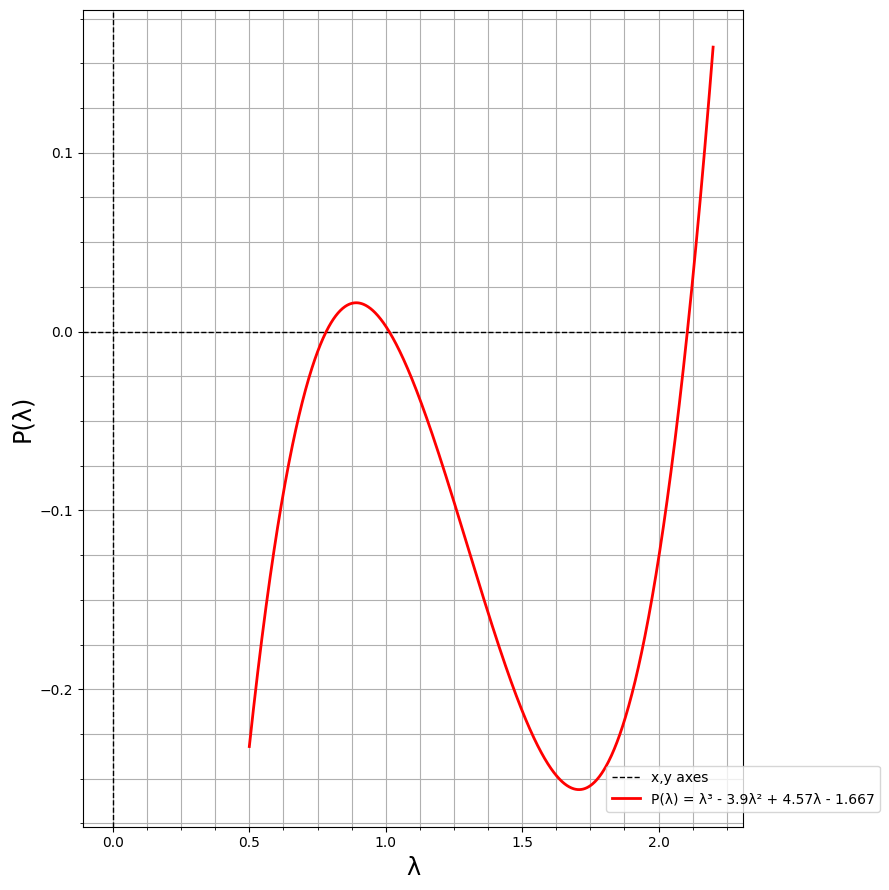

In [406]:
λ_plotting_interval = (0.5, 2.2)
print(f"Plotting the polynomial in the λ interval {λ_plotting_interval}:")
plot_polynomial(coefficients, λ_interval_tuple=λ_plotting_interval)

In [407]:
precision = 0.001
interval_tuple_lst = [(0.625, 0.850), (0.9, 1.125), (2.0, 2.125)]
initial_guess_lst = [0.650, 1.0, 2.1]
print(f"Roots of the polynomial {polynomial} with precision {precision}:")
display_roots_newton(p, interval_tuple_lst, initial_guess_lst, e, coefficients)


Roots of the polynomial P(λ) = λ³ - 3.9λ² + 4.57λ - 1.667 with precision 0.001:
λ₁ = 0.782
λ₂ = 1.012
λ₃ = 2.106


#### 16-th variant

In [408]:
A = np.array([[ 3.2, 1.0, 2.2],
              [ 1.0, 3.7, 2.2],
              [ 2.2, 2.2, 4.2]])

print("Coefficients of characteristic polynomial:")
coefficients = faddeev_leverrier(A)
display_coeficients(coefficients)

Coefficients of characteristic polynomial:
p₀ = 1.0
p₁ = -11.1
p₂ = 30.14
p₃ = -21.812


In [409]:
print("Our characteristic polynomial:")
polynomial = polynomial_str(coefficients)
print(polynomial)


Our characteristic polynomial:
P(λ) = λ³ - 11.1λ² + 30.14λ - 21.812


Plotting the polynomial in the λ interval (0.5, 8):


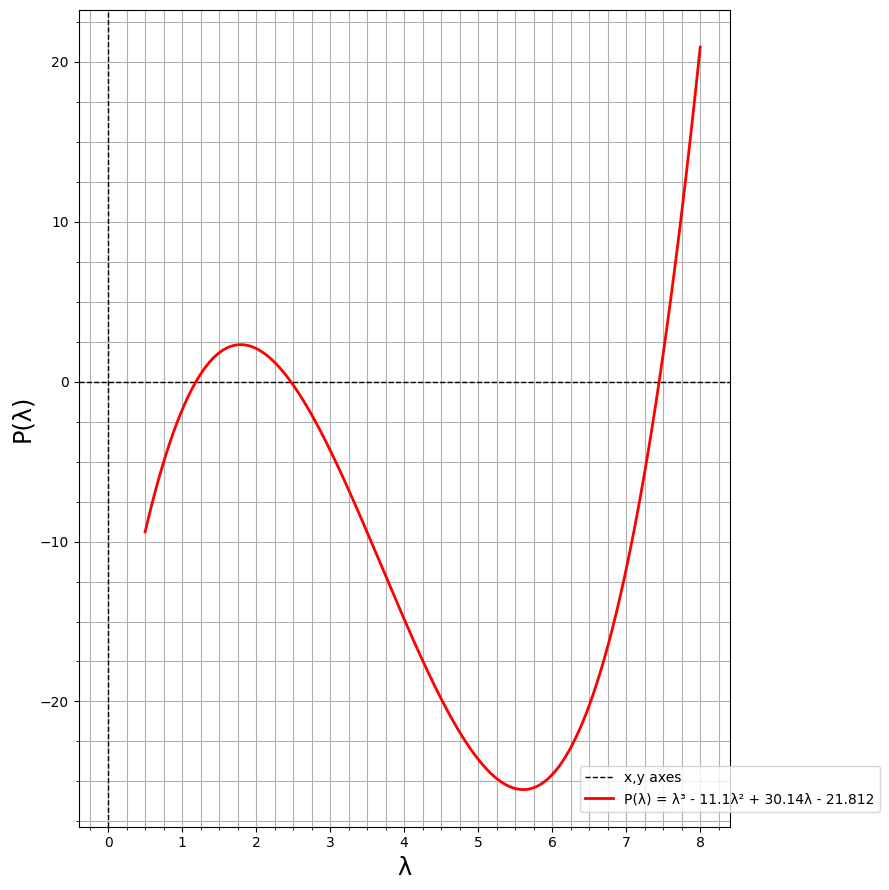

In [410]:
λ_plotting_interval = (0.5, 8)
print(f"Plotting the polynomial in the λ interval {λ_plotting_interval}:")
plot_polynomial(coefficients, λ_interval_tuple=λ_plotting_interval)

In [411]:
precision = 0.001
interval_tuple_lst = [(1.0, 1.5), (2.25, 2.75), (7.0, 8.0)]
initial_guess_lst = [1.2, 2.5, 7.5]
print(f"Roots of the polynomial {polynomial} with precision {precision}:")
display_roots_newton(p, interval_tuple_lst, initial_guess_lst, e, coefficients)

Roots of the polynomial P(λ) = λ³ - 11.1λ² + 30.14λ - 21.812 with precision 0.001:
λ₁ = 1.187
λ₂ = 2.467
λ₃ = 7.445


#### 24-rd variant

In [412]:
A = np.array([[ 3.4, 1.0, 2.4],
              [ 1.0, 3.9, 2.4],
              [ 2.4, 2.4, 4.4]])

print("Coefficients of characteristic polynomial:")
coefficients = faddeev_leverrier(A)
display_coeficients(coefficients)

Coefficients of characteristic polynomial:
p₀ = 1.0
p₁ = -11.7
p₂ = 32.86
p₃ = -23.416


In [413]:
print("Our characteristic polynomial:")
polynomial = polynomial_str(coefficients)
print(polynomial)

Our characteristic polynomial:
P(λ) = λ³ - 11.7λ² + 32.86λ - 23.416


Plotting the polynomial in the λ interval (0.5, 8.3):


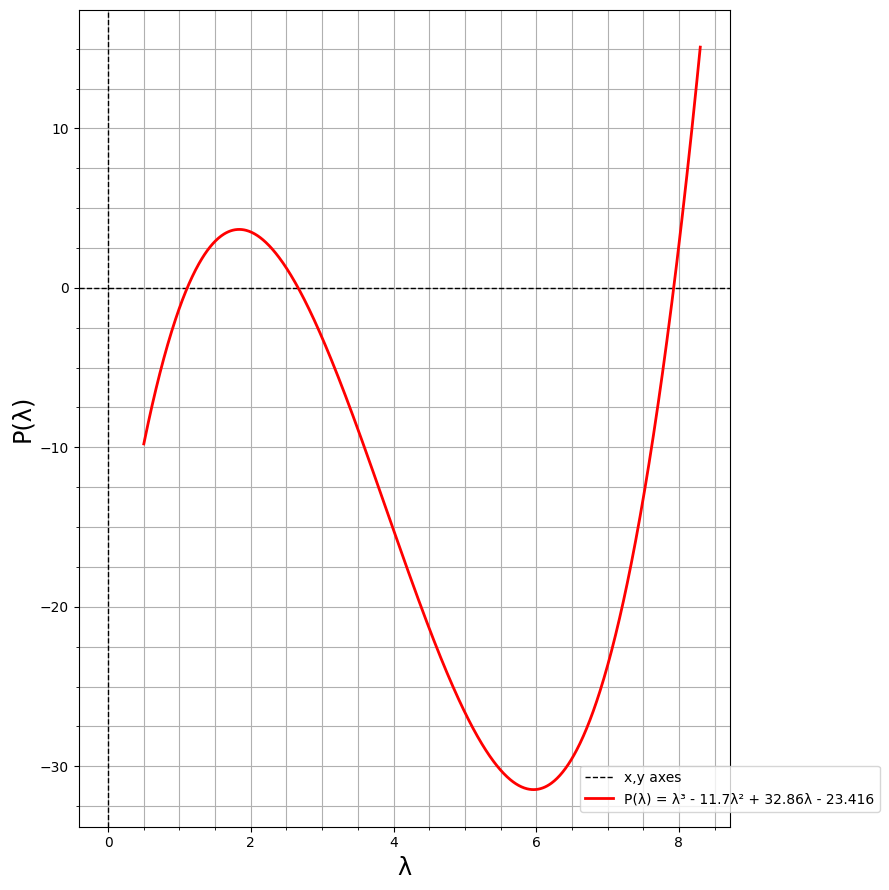

In [414]:
λ_plotting_interval = (0.5, 8.3)
print(f"Plotting the polynomial in the λ interval {λ_plotting_interval}:")
plot_polynomial(coefficients, λ_interval_tuple=λ_plotting_interval)

In [415]:
precision = 0.001
interval_tuple_lst = [(1.0, 1.5), (2.0, 3.0), (7.5, 8.5)]
initial_guess_lst = [1.1, 2.1, 7.6]
print(f"Roots of the polynomial {polynomial} with precision {precision}:")
display_roots_newton(p, interval_tuple_lst, initial_guess_lst, e, coefficients)

Roots of the polynomial P(λ) = λ³ - 11.7λ² + 32.86λ - 23.416 with precision 0.001:
λ₁ = 1.109
λ₂ = 2.663
λ₃ = 7.928
